Terminei a raspagem de dados


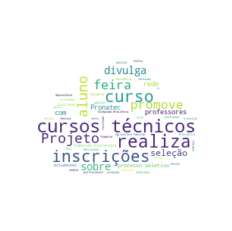

In [14]:
import requests
from bs4 import BeautifulSoup as soup
from selenium import webdriver

url = 'https://ufrn.br/imprensa/noticias/filtros?text=eaj'

options = webdriver.ChromeOptions()
options.headless = True

driver = webdriver.Chrome()

driver.get(url)

try:
    palavras = ' '
    anosNoticias = []
    
    for pages in range (13):
        
        body = driver.find_element_by_tag_name('body')
        html = body.get_attribute('innerHTML')
        soupPage = soup(html, 'html5lib')
        noticiasList = soupPage.findAll( "a", class_='blue-link')
        datasNoticias = soupPage.findAll("div", class_='block-title')

        for a in range(len(datasNoticias)):
            aux = datasNoticias[a].findChild().get_text()
            anosNoticias.append(int(aux[-4:]))
        
        for i in range(len(noticiasList)):
            palavras += noticiasList[i].get_text()
            palavras += ' '
        
        driver.find_element_by_xpath("//a[contains(text(),'>')]").click()        
        
        time.sleep(2)
    
except Exception as e:
    print(e)
    
print('Terminei a raspagem de dados')
driver.close()

from wordcloud import WordCloud, STOPWORDS

STOPWORDS = ['ver','principal','essa','vez','nas','mas',
             'qual','principal','ele','ter','doença','pois','este',
             'vez','ver principal','artigo principal','já',
             'aos','pode','outro','artigo','desse',
             'alguns','meio','entre','das','podem','esse',
             'seu','também','são','quando','de', 'que','em',
             'os','as','da','como','dos','ou','se','um','uma',
             'para','na','ao','mais','por','não','ainda','muito','sua',
             'a', 'é', 'o', 'e', 'no', 'do', 'programa', 'EAJ', 'UFRN', 'abre', 'da',
             'grau', 'do', 'se', 'em', 'em', '']

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

def create_word_cloud(string):
   maskArray = np.array(Image.open("cloud.jpeg"))
   cloud = WordCloud(background_color = "white", max_font_size=50, max_words = 500, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
   plt.figure()
   plt.imshow(cloud, interpolation='bilinear')
   plt.axis('off')

create_word_cloud(palavras)